
# **Gurobi 2: Modelado y Resolución de Problemas de Programación Lineal**  

## **Introducción**  
La **Programación Lineal (PL)** es una técnica matemática utilizada para la optimización de recursos. Su objetivo es encontrar el mejor resultado posible (maximizar o minimizar) bajo un conjunto de restricciones.  

### **Componentes de un Problema de PL:**  
🔹 **Variables de decisión**: Representan las decisiones a tomar (ejemplo: cuánto producir, cuántos recursos asignar).  
🔹 **Función objetivo**: Es la función matemática que queremos **maximizar** (ejemplo: ganancias) o **minimizar** (ejemplo: costos).  
🔹 **Restricciones**: Son las limitaciones del sistema (ejemplo: disponibilidad de materias primas, tiempo de producción).  

💡 **Ejemplo práctico:**  
Una fábrica produce dos tipos de productos: **mesas y sillas**. Cada producto requiere cierta cantidad de madera y horas de trabajo. El objetivo es **maximizar las ganancias**, respetando las limitaciones de recursos disponibles.  
    

## **Paso 1: Instalación y Configuración de Gurobi**

In [ ]:
# Descargar e instalar Gurobi desde la fuente oficial
!add-apt-repository -y ppa:deadsnakes/ppa
!apt-get update
!apt-get install -y python3.10
!pip install -i https://pypi.gurobi.com gurobipy

In [ ]:
!pip install gurobipy

# Importar la biblioteca
import gurobipy as gp
from gurobipy import GRB

print("Gurobi instalado y listo para usarse.")


## **Paso 2: Modelado del Problema de Optimización**  

📌 **Problema:**  
Una empresa fabrica **mesas (x1)** y **sillas (x2)**. Cada unidad requiere **madera y horas de trabajo**, y la empresa busca **maximizar sus ganancias**.  

📊 **Datos del problema:**  

| Recurso       | Mesa (x1) | Silla (x2) | Disponibilidad |
|--------------|----------|-----------|---------------|
| Madera (m²) | 4        | 3         | 24            |
| Trabajo (horas) | 2     | 1         | 10            |
| Ganancia ($) | 20      | 15        | -             |  

🎯 **Modelo matemático:**  

Maximizar:  
$$Z = 20x1 + 15x2$$
Sujeto a:  
$$4x1 + 3x2 \leq 24  \quad  \text{(Restricción de madera)}$$
$$2x1 + x2 \leq 10  \quad 	\text{(Restricción de horas de trabajo)}  $$
$$x1, x2 \geq 0  \quad 	\text{(No podemos producir cantidades negativas)}   $$
    

In [ ]:

# Crear el modelo de optimización
modelo = gp.Model("Producción_Mesas_Sillas")

# Definir variables de decisión
x1 = modelo.addVar(name="Mesas", vtype=GRB.CONTINUOUS)
x2 = modelo.addVar(name="Sillas", vtype=GRB.CONTINUOUS)

# Establecer la función objetivo (maximizar ganancias)
modelo.setObjective(20*x1 + 15*x2, GRB.MAXIMIZE)

# Agregar restricciones de recursos
modelo.addConstr(4*x1 + 3*x2 <= 24, name="Restriccion_Madera")
modelo.addConstr(2*x1 + x2 <= 10, name="Restriccion_Trabajo")

# Resolver el modelo
modelo.optimize()



## **Paso 3: Interpretación de los Resultados**  
Una vez resuelto el modelo, analizamos los valores óptimos y la función objetivo.  
✏️ **Preguntas a responder:**  
1. ¿Cuántas mesas y sillas se deben producir para maximizar las ganancias?  
2. ¿Cuál es la ganancia máxima que se puede obtener?  
3. ¿Alguna restricción está completamente utilizada (activa)?  
    

In [ ]:

# Mostrar la solución óptima
if modelo.status == GRB.OPTIMAL:
    print(f"Cantidad óptima de mesas (x1): {x1.x}")
    print(f"Cantidad óptima de sillas (x2): {x2.x}")
    print(f"Ganancia máxima posible: ${modelo.objVal}")
else:
    print("No se encontró una solución óptima.")


## **Paso 4: Visualización de la Solución**

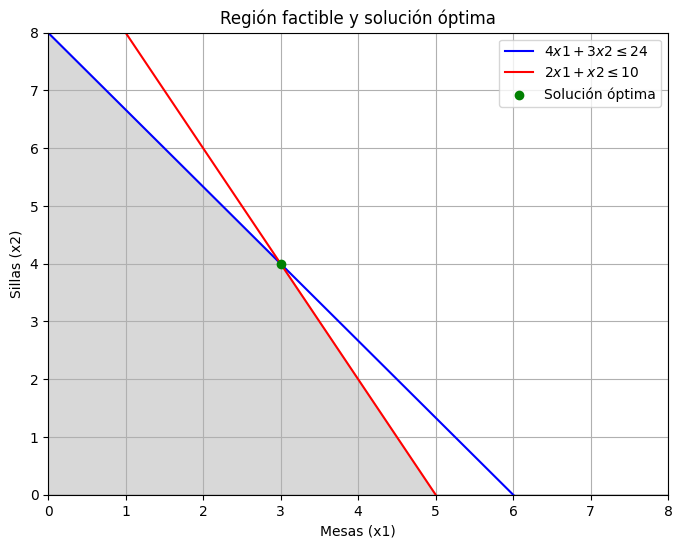

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Definir restricciones
x_vals = np.linspace(0, 10, 100)
y1_vals = (24 - 4*x_vals) / 3  # Restricción de madera
y2_vals = (10 - 2*x_vals)  # Restricción de trabajo

# Crear gráfico
plt.figure(figsize=(8,6))
plt.plot(x_vals, y1_vals, label=r'$4x1 + 3x2 \leq 24$', color='blue')
plt.plot(x_vals, y2_vals, label=r'$2x1 + x2 \leq 10$', color='red')

# Rellenar la región factible
plt.fill_between(x_vals, np.minimum(y1_vals, y2_vals), 0, color='gray', alpha=0.3)

# Marcar la solución óptima
plt.scatter(x1.x, x2.x, color='green', zorder=3, label="Solución óptima")

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel("Mesas (x1)")
plt.ylabel("Sillas (x2)")
plt.legend()
plt.grid()
plt.title("Región factible y solución óptima")
plt.show()



## **Ejercicios para el Alumno**  
Ahora que has modelado y resuelto un problema de optimización en Gurobi, completa los siguientes ejercicios:  

1. **Modifica la función objetivo** para minimizar \(Z = 20x1 + 15x2\) en lugar de maximizar.  
2. **Agrega una nueva restricción**: No más de 5 mesas pueden ser producidas.  
3. **Prueba diferentes valores en las restricciones** y observa cómo cambian los resultados.  
4. **Recrea el gráfico de la región factible** después de modificar las restricciones.  
5. **Explica qué sucede cuando cambias los coeficientes de la función objetivo.**  

✍️ **Instrucciones:**  
- Copia el código en nuevas celdas y realiza las modificaciones necesarias.  
- Ejecuta el modelo y analiza los resultados obtenidos.  
- Usa gráficos para visualizar las soluciones óptimas.  
    